<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Architectures/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron (MLP)

The Multilayer Perceptron (MLP) is the foundational architecture for modern neural networks. It consists of multiple layers of artificial neurons (perceptrons) that can approximate complex functions and learn patterns in data.

## Historical Context

The story of MLPs began with the simple perceptron model introduced by Frank Rosenblatt in 1958. However, as Minsky and Papert demonstrated in 1969, single-layer perceptrons couldn't solve linearly inseparable problems (like XOR). This limitation was overcome with the introduction of:

1. Multiple layers of perceptrons (hidden layers)
2. Non-linear activation functions
3. The backpropagation algorithm for training (popularized in the 1980s)

These innovations form the basis of what we now call the Multilayer Perceptron.

## Architecture

An MLP architecture typically consists of:

1. **Input Layer**: Neurons corresponding to features in the input data
2. **Hidden Layer(s)**: One or more layers that perform non-linear transformations
3. **Output Layer**: Produces the final prediction/classification


Each connection between neurons has an associated weight, and each neuron typically has a bias term. The output of each neuron is computed as:

$$y = \sigma\left(\sum_{i=1}^{n} w_i x_i + b\right)$$

Where:
- $\sigma$ is a non-linear activation function
- $w_i$ are the weights
- $x_i$ are the inputs
- $b$ is the bias term

In [16]:
%%html
<div style="display: flex; justify-content: center; margin: 20px;">
  <svg width="600" height="380" xmlns="http://www.w3.org/2000/svg">
    <!-- Layer Labels -->
    <text x="80" y="40" font-family="Arial" font-size="16" text-anchor="middle" font-weight="bold">Input Layer</text>
    <text x="300" y="40" font-family="Arial" font-size="16" text-anchor="middle" font-weight="bold">Hidden Layer</text>
    <text x="520" y="40" font-family="Arial" font-size="16" text-anchor="middle" font-weight="bold">Output Layer</text>
    
    <!-- Input Layer Neurons -->
    <circle cx="80" cy="100" r="25" fill="#6495ED" stroke="black" stroke-width="2"/>
    <circle cx="80" cy="190" r="25" fill="#6495ED" stroke="black" stroke-width="2"/>
    <circle cx="80" cy="280" r="25" fill="#6495ED" stroke="black" stroke-width="2"/>
    <text x="80" y="100" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">x₁</text>
    <text x="80" y="190" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">x₂</text>
    <text x="80" y="280" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">x₃</text>

    <!-- Hidden Layer Neurons -->
    <circle cx="300" cy="80" r="25" fill="#FFA500" stroke="black" stroke-width="2"/>
    <circle cx="300" cy="160" r="25" fill="#FFA500" stroke="black" stroke-width="2"/>
    <circle cx="300" cy="240" r="25" fill="#FFA500" stroke="black" stroke-width="2"/>
    <circle cx="300" cy="320" r="25" fill="#FFA500" stroke="black" stroke-width="2"/>
    <text x="300" y="80" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">h₁</text>
    <text x="300" y="160" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">h₂</text>
    <text x="300" y="240" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">h₃</text>
    <text x="300" y="320" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">h₄</text>

    <!-- Output Layer Neurons -->
    <circle cx="520" cy="140" r="25" fill="#90EE90" stroke="black" stroke-width="2"/>
    <circle cx="520" cy="240" r="25" fill="#90EE90" stroke="black" stroke-width="2"/>
    <text x="520" y="140" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">y₁</text>
    <text x="520" y="240" font-family="Arial" font-size="14" text-anchor="middle" dominant-baseline="middle">y₂</text>

    <!-- Connections from Input to Hidden Layer -->
    <!-- Input 1 to all hidden -->
    <line x1="105" y1="100" x2="275" y2="80" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="100" x2="275" y2="160" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="100" x2="275" y2="240" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="100" x2="275" y2="320" stroke="#999" stroke-width="1.5"/>
    
    <!-- Input 2 to all hidden -->
    <line x1="105" y1="190" x2="275" y2="80" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="190" x2="275" y2="160" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="190" x2="275" y2="240" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="190" x2="275" y2="320" stroke="#999" stroke-width="1.5"/>
    
    <!-- Input 3 to all hidden -->
    <line x1="105" y1="280" x2="275" y2="80" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="280" x2="275" y2="160" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="280" x2="275" y2="240" stroke="#999" stroke-width="1.5"/>
    <line x1="105" y1="280" x2="275" y2="320" stroke="#999" stroke-width="1.5"/>

    <!-- Connections from Hidden to Output Layer -->
    <!-- All hidden to output 1 -->
    <line x1="325" y1="80" x2="495" y2="140" stroke="#999" stroke-width="1.5"/>
    <line x1="325" y1="160" x2="495" y2="140" stroke="#999" stroke-width="1.5"/>
    <line x1="325" y1="240" x2="495" y2="140" stroke="#999" stroke-width="1.5"/>
    <line x1="325" y1="320" x2="495" y2="140" stroke="#999" stroke-width="1.5"/>
    
    <!-- All hidden to output 2 -->
    <line x1="325" y1="80" x2="495" y2="240" stroke="#999" stroke-width="1.5"/>
    <line x1="325" y1="160" x2="495" y2="240" stroke="#999" stroke-width="1.5"/>
    <line x1="325" y1="240" x2="495" y2="240" stroke="#999" stroke-width="1.5"/>
    <line x1="325" y1="320" x2="495" y2="240" stroke="#999" stroke-width="1.5"/>
  </svg>
</div>
<div style="text-align:center; margin-bottom:30px; font-family:Arial;">
  <em>Fig 1: Multilayer Perceptron with one hidden layer (3 inputs, 4 hidden neurons, 2 outputs)</em>
</div>

## Implementation Using Modern Frameworks

In practice, MLPs are typically implemented using deep learning frameworks. Here's how you can create an MLP using PyTorch and TensorFlow/Keras:

### PyTorch Implementation

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the XOR problem data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the model
class PyTorchMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PyTorchMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Create model, loss function, and optimizer
model = PyTorchMLP(input_size=2, hidden_size=4, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

# Convert data to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Train the model
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    test_outputs = model(X_tensor)
    print("\nPyTorch Model Predictions:")
    for i in range(len(X)): 
        print(f"Input: {X[i]}, Target: {y[i][0]}, Prediction: {test_outputs[i].item():.4f}, Rounded: {round(test_outputs[i].item())}")

Epoch 0, Loss: 0.2619
Epoch 1000, Loss: 0.2235
Epoch 2000, Loss: 0.0146
Epoch 3000, Loss: 0.0042
Epoch 4000, Loss: 0.0023
Epoch 5000, Loss: 0.0016
Epoch 6000, Loss: 0.0012
Epoch 7000, Loss: 0.0009
Epoch 8000, Loss: 0.0008
Epoch 9000, Loss: 0.0007

PyTorch Model Predictions:
Input: [0 0], Target: 0, Prediction: 0.0188, Rounded: 0
Input: [0 1], Target: 1, Prediction: 0.9765, Rounded: 1
Input: [1 0], Target: 1, Prediction: 0.9749, Rounded: 1
Input: [1 1], Target: 0, Prediction: 0.0275, Rounded: 0


## Visualizing Decision Boundaries

Let's visualize how our MLP has learned to separate the XOR problem:

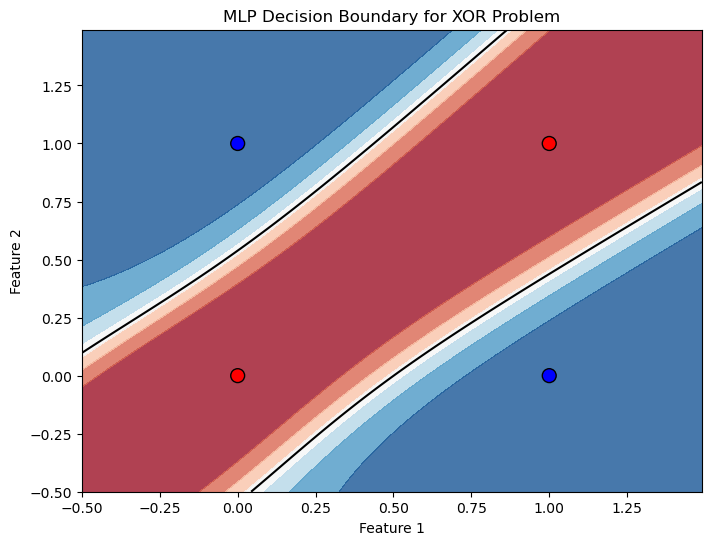

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Create a mesh grid
h = 0.01
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create input data for prediction
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from our PyTorch model
grid_tensor = torch.FloatTensor(grid_points)
with torch.no_grad():
    Z = model(grid_tensor).numpy()
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linestyles='-')

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=ListedColormap(['red', 'blue']), edgecolors='k', s=100)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('MLP Decision Boundary for XOR Problem')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Applications of MLPs

Multilayer Perceptrons have been applied to many problems including:

1. **Classification**: Handwritten digit recognition, spam detection, sentiment analysis
2. **Regression**: Price prediction, demand forecasting
3. **Pattern Recognition**: Speech recognition, image classification
4. **Function Approximation**: Modeling complex relationships between variables

Despite being largely superseded by more specialized architectures for specific tasks, MLPs remain a fundamental building block in many neural network designs and are often used as baseline models.

## Advantages and Limitations

### Advantages
- Universal function approximators (can approximate any continuous function)
- Simple to understand and implement
- Work well for tabular data with clear feature relationships
- Require relatively little preprocessing compared to other algorithms

### Limitations
- No spatial awareness (for images) or temporal awareness (for sequences)
- Prone to overfitting with limited data
- All neurons between layers must be connected, leading to many parameters
- Struggle with very high-dimensional data
- No built-in feature extraction capability

These limitations led to the development of specialized architectures like CNNs for images and RNNs/Transformers for sequential data.

## Further Reading

1. Rosenblatt, F. (1958). "The perceptron: A probabilistic model for information storage and organization in the brain." *Psychological Review*, 65(6), 386–408.
2. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). "Learning representations by back-propagating errors." *Nature*, 323(6088), 533–536.
3. Hornik, K. (1991). "Approximation capabilities of multilayer feedforward networks." *Neural Networks*, 4(2), 251–257.
4. Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.